# Problem-solving notebook

### Exercise

Given the following list of first and last names, write a nested Python loop to print every combination of first and last name.

In [3]:
first=['Xue', 'Mary', 'Robert']
last=['Li', 'Smith', 'Dixon']

The first step is to understand the problem, so let's figure out what the output looks like:

```
Xue Li
Xue Smith
Xue Dixon
Mary Li
Mary Smith
Mary Dixon
Robert Li
Robert Smith
Robert Dixon
```

If we were trying to do this for two arbitrary lists, we should think about the edge cases, such as when one or both of the lists are empty.  Let's assume that we fully understand the problem now.

The next step is to try to solve the problem, which we must be able to manually. Unless you are an experienced programmer, it's best not to think about coding at this point. I literally think about moving my fingers or data around. In this case, I use a finger on each list and then for every top pointer finger I move my finger through all of the bottom fingers:

<img src="images/first-last.png" width="200">

When you hear the "all combinations" pattern, think of nested loops.  Moving a finger through a list also screams loop! Here's one possible imitation:

In [4]:
for f in first:
    for l in last:
        print(f+' '+l)

Xue Li
Xue Smith
Xue Dixon
Mary Li
Mary Smith
Mary Dixon
Robert Li
Robert Smith
Robert Dixon


How would you solve this with a list comprehension (to get a list of instead of printing all combinations)?

In [5]:
[f+' '+l for f in first for l in last]

['Xue Li',
 'Xue Smith',
 'Xue Dixon',
 'Mary Li',
 'Mary Smith',
 'Mary Dixon',
 'Robert Li',
 'Robert Smith',
 'Robert Dixon']

### Exercise

Imagine you work for a company that has a website and you'd like to be able to show ads on the various webpages on the website.  Customers that want to purchase ads by a certain fraction of the ad "impressions".  For example, company X might buy 30%, company Y 60%, and company Z 10% of the ad space. Your job is to randomly show the company's ads, but in the correct proportions.

To solve this problem, but it helps to visualize the relationship between the companies; we might draw a bar chart on paper that looks like this:

In [11]:
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'  # gets sharper images

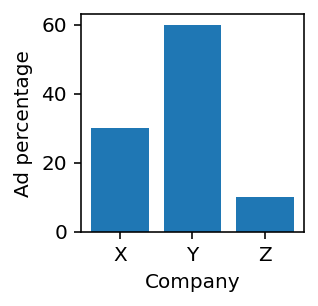

In [20]:
plt.figure(figsize=(2,2))
plt.bar(["X","Y","Z"],[30,60,10])
plt.xlabel("Company")
plt.ylabel("Ad percentage")
plt.show()

We need to roll some random computer dice with three sides that are biased in this way. Another way to look at this as throwing darts at the wall and having most of the darts end up in the Y column, 30% in the X column, etc... Without altering gravity, that's hard to do. An easier way is to stretch things out so that the width of each company's region is proportional to its percentage, which then flattens out the heights of the bars:

<!-- this doesn't work for some reason
<img src="images/ads-regions.png" width="200">
-->

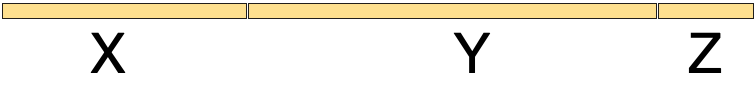

In [81]:
from IPython.display import Image
Image(filename='images/ads-regions.png', width=300)

If we throw darts at this overall region, X will get 30%, Y will get 60%, and Z will get 10%. So this tells us an approach: pick a uniform random number and figure out which region it falls in and report that company's ad.

So now we know how to solve it, let's code it up. Obviously we have some research to do because we need to figure out how to get a random number. There are a number of ways, but let's use numpy:

In [53]:
import numpy as np

np.random.random(), np.random.random(), np.random.random()

(0.28303724541929176, 0.22632693066739307, 0.9911636318590673)

Let's make a function that returns a company name with every call. To keep things simple, let's do it for the fixed three companies we've been talking about:

In [65]:
def select(companies):
    i = np.random.random() # throw a dart
    if i>=0 and i<.30:
        return companies[0]
    if i>=.30 and i<.90:
        return companies[1]
    return companies[2]

In [79]:
ads = [select(companies=["X","Y","Z"]) for i in range(1000)]
ads[:15]

['X', 'Y', 'Y', 'Y', 'X', 'X', 'Y', 'X', 'Z', 'Y', 'X', 'Y', 'Y', 'Z', 'X']

As part of our problem-solving strategy, we also need to verify things, so let's do a histogram to verify the percentages look right:

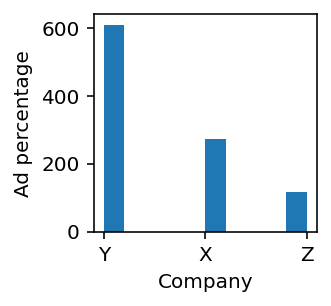

In [74]:
plt.figure(figsize=(2,2))
plt.hist(ads)
plt.xlabel("Company")
plt.ylabel("Ad percentage")
plt.show()

### Exercise

In the previous exercise, we used the histogram functionality of the plotting library to compute the number of X, Y, and Z company values in the `ads` list. Now, let's figure out a way to efficiently keep a count for the company names in the list, without relying on built-in functionality.  To make it more interesting, we're opening up to more than just the three companies.

In [114]:
companies=["Google","Apple","FaceBook","HP","SAP"]
n = len(companies)

As a subexercise, how would we get a uniform random sample of 5000 company names from this list? To get you familiar with the vector-based approach of numpy, let's ask for a list of integer indexes into the company's list of size 5000. The index values should be integers and in the range `[0,n)`:

In [125]:
idxs = np.random.randint(low=0,high=n,size=5000)
idxs[0:50]

array([2, 1, 2, 4, 1, 1, 2, 1, 3, 3, 2, 1, 4, 2, 4, 3, 4, 0, 1, 0, 4, 2,
       3, 4, 1, 0, 2, 4, 3, 2, 4, 0, 4, 3, 3, 2, 0, 2, 4, 2, 0, 4, 1, 3,
       4, 3, 0, 0, 0, 1])

Let's also convert the list to a numpy array, which then allows us to use a list of integers as an index:

In [126]:
companies = np.array(companies)
names = companies[idxs]
names[0:15]

array(['FaceBook', 'Apple', 'FaceBook', 'SAP', 'Apple', 'Apple',
       'FaceBook', 'Apple', 'HP', 'HP', 'FaceBook', 'Apple', 'SAP',
       'FaceBook', 'SAP'], dtype='<U8')

We could also do this with a list comprehension in pure Python, but it's a good idea to get familiar with numpy.

Ok, now we have a list of companies and would like to count the number of occurrences of each. If we wanted to use numpy, we could do the following:

In [127]:
np.unique(names, return_counts=True)

(array(['Apple', 'FaceBook', 'Google', 'HP', 'SAP'], dtype='<U8'),
 array([ 951, 1019,  985, 1060,  985]))

Instead, we want to implement this ourselves.   We are given a list of company names with multiple occurrences of each.  To solve this, we don't think about code and think about how we would do this by hand. The first thing I would do is to create a table with a company name and account to the right, something like this:

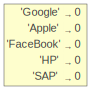

In [128]:
from lolviz import *
objviz({c:0 for c in companies})

Then, I would move my finger down the list of company names and the count in my table for the company pointed to by my finger:

<img src="images/companies.png" width="400">

That sounds like a good approach and therefore we can code this up.  Every time I think of moving my finger down a list, I think of a for loop of some kind.   When I think of a table mapping company name to account, I think of a dictionary.

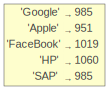

In [129]:
counts = {c:0 for c in companies}
for name in names:
    counts[name] += 1
objviz(counts)

We would expect the numbers to be roughly the same, which they are. If we increase the sample size to 10,000, the counts would be even closer.

### Exercise


download a csv file from the web with requests and save it to a local file

### Exercise

use pandas to get the tables from an HTML page and save to local file perhaps saving in a different format with them without pandas. maybe use feather too

### Exercise
